# <center>Metody Numeryczne</center>

# Laboratorium 8: Rozwiązywanie równań nieliniowych


**Wykonał:** Kacper Jasinski

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest poznanie numerycznych metod rozwiązywania układów równań nieliniowych. W ramach laboratorium przedstawione zostaną metody: [*bisekcji*](https://www.wikiwand.com/pl/articles/Metoda_r%C3%B3wnego_podzia%C5%82u), [*siecznych*](https://www.wikiwand.com/pl/articles/Metoda_siecznych) oraz [*Newtona*](https://www.wikiwand.com/pl/articles/Metoda_Newtona).

Tematem wiodącym podczas tych zajęć będzie poszukiwanie miejsc zerowych funkcji zdefiniowanej w następujący sposób: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$

Funkcja $f(x)$ oraz jej pierwsza i druga pochodna ($f'(x)$, $f''(x)$) zostały zaimplementowane w pliku `main.py`, odpowiednio jako `func()`, `dfunc()` i `ddfunc()`.

### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt

---

### **Zadanie 1.**

1. Zaprezentuj na jednym wykresie przebieg funkcji $f(x)$, $f'(x)$ oraz $f''(x)$, w taki sposób, aby na podstawie rysunku można było zgrubnie określić położenie miejsc zerowych funkcji.

2. Na podstawie analizy wykresu określ przedziały, w których znajdują się miejsca zerowe funkcji $f(x)$.

3. Odpowiedz w jaki sposób (wykorzystując pierwszą i drugą pochodną) można znaleźć miejsca zerowe funkcji.


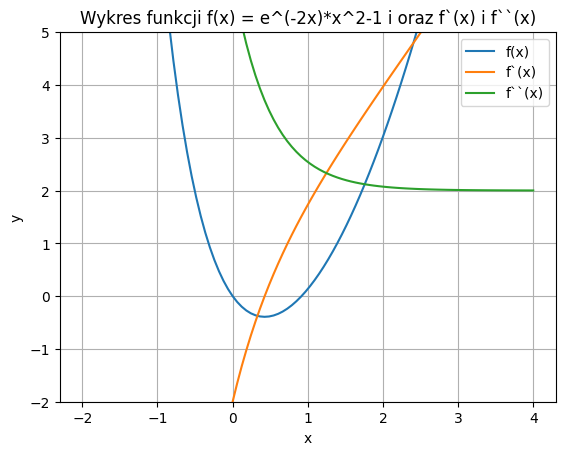

In [39]:
# ===== Twoja implementacja tutaj =====
x = np.linspace(-2, 4, 100)
fig, ax = plt.subplots()
ax.set_ylim(-2, 5)
ax.plot(x, main.func(x), label='f(x)')
ax.plot(x, main.dfunc(x), label='f`(x)')
ax.plot(x, main.ddfunc(x), label='f``(x)')
ax.grid(True)
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_title("Wykres funkcji f(x) = e^(-2x)*x^2-1 i oraz f`(x) i f``(x)")
ax.legend()


Wnioski do zad 1.
Na podstawie wykresu funkcji f(x)=e^(−2x)+x^2−1 oraz jej pierwszej i drugiej pochodnej można z grubsza określić położenie miejsc zerowych. Widać, że funkcja ma dwa miejsca zerowe. Jedno dokładnie w x=0, a drugie w przedziale około [−0.5, 1]. Miejsca zerowe można znaleźć wykorzystując pierwszą pochodną do określenia punktów krytycznych funkcji oraz drugą pochodną do analizy wklęsłości, co pomaga wybrać odpowiednie przedziały i punkty startowe dla metod numerycznych, takich jak bisekcja, sieczne czy metoda Newtona. Analiza pochodnych pozwala przyspieszyć zbieżność iteracji i zwiększa dokładność wyznaczanych miejsc zerowych.

---

### **Zadanie 2.**

Najprostszą metodą do wyznaczenia miejsc zerowych funkcji nieliniowej jest [metoda bisekcji](https://en.wikipedia.org/wiki/Bisection_method). 

Zaimplementuj funkcję *`bisection()`* pamiętając, że gwarancją zbieżności metody bisekcji dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

Wnioski do zad 2.
W tym zadaniu zaimplementowano funkcję bisection(). Na początku sprawdzane są poprawne typy parametrów. Następnie obliczane są wartości funkcji na końcach przedziału fa = f(a) i fb = f(b), aby uniknąć wielokrotnego obliczania. Jeśli któraś z wartości jest mniejsza od zadanej tolerancji epsilon, funkcja zwraca krotkę z aproksymowanym miejscem zerowym i liczbą iteracji równą zero. Sprawdzany jest również warunek zmiany znaku funkcji na końcach przedziału, który gwarantuje istnienie miejsca zerowego. W pętli while wykonywane są kolejne iteracje: obliczane jest środkowe c = (a + b)/2, sprawdzana jest wartość fc = f(c) i porównywana z tolerancją. Jeśli fc nie spełnia warunku stopu, wybierany jest podprzedział [a, c] lub [c, b], w którym znajduje się miejsce zerowe, a iteracja jest zwiększana. Funkcja zwraca przybliżone rozwiązanie i liczbę wykonanych iteracji.

---

### **Zadanie 3.**

Bardziej zaawansowaną metodą wyznaczania miejsc zerowych jest [metoda siecznych](https://en.wikipedia.org/wiki/Secant_method), która stanowi rozwinięcie [metody Regula Falsi](https://en.wikipedia.org/wiki/Regula_falsi).

Zaimplementuj funkcję *`secant()`* pamiętając, że gwarancją zbieżności metody siecznych dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

3. Pierwsza i druga pochodna funkcji $f(x)$ są ciągłe w przedziale domkniętym $[a,b]$.

4. Pierwsza i druga pochodna funkcji $f(x)$ w przedziale domkniętym $[a, b]$ mają stały znak i są różne od zera.


Wnioski do zad 3.
W Zadaniu 3 zaimplementowano funkcję secant(), wykorzystującą metodę siecznych do wyznaczania miejsc zerowych funkcji. Na początku sprawdzane są poprawne typy parametrów. Następnie przypisywane są wartości początkowe x0 = a i x1 = b oraz odpowiadające im wartości funkcji fx0 i fx1. Jeżeli któraś z wartości jest już bliska zeru (mniejsza od epsilon), funkcja zwraca wynik natychmiast. W pętli wykonywane są kolejne iteracje: najpierw sprawdzany jest warunek, aby nie dzielić przez zero (fx1 - fx0 != 0), następnie obliczane jest nowe przybliżenie x2 ze wzoru metody siecznych. Sprawdzany jest warunek stopu, czyli czy różnica |x2 - x1| lub wartość funkcji |f(x2)| jest mniejsza od tolerancji epsilon. Po każdym kroku aktualizowane są zmienne x0 i x1 oraz odpowiadające im wartości funkcji, aby kontynuować iteracje. Funkcja zwraca przybliżone miejsce zerowe oraz liczbę wykonanych iteracji.

---

### **Zadanie 4.**

Inną metodą, wykorzystywaną do poszukiwania miejsc zerowych funkcji, jest [metoda Newtona](https://en.wikipedia.org/wiki/Newton%27s_method), nazywana również metodą stycznych.

**Podpunkt 1.**

Algorytm metody Newtona wykorzystuje wartości pierwszej pochodnej, dlatego przed przystąpieniem do jej implementacji przygotuj pomocniczą funkcję *`difference_quotient()`*, służącą do wyznaczenia wartości ilorazu różnicowego.

<br>

**Podpunkt 2.**

Zaimplementuj funkcję *`newton()`* pamiętając, że gwarancją zbieżności metody Newtona dla poszukiwania miejsca zerowego funkcji $f(x)$ na odcinku $[a,b]$ są następujące założenia:

1. Funkcja $f(x)$ jest ciągła w przedziale domkniętym $[a,b]$.

2. Funkcja $f(x)$ przyjmuje różne znaki na końcach przedziału: $f(a)f(b)<0$.

3. Pierwsza i druga pochodna funkcji $f(x)$ są ciągłe w przedziale domkniętym $[a,b]$.

4. Pierwsza i druga pochodna funkcji $f(x)$ w przedziale domkniętym $[a, b]$ mają stały znak i są różne od zera.

Wnioski do zad 4.
W Zadaniu 4 zaimplementowano funkcję newton(), wykorzystującą metodę Newtona (stycznych) do znajdowania miejsc zerowych funkcji. Na początku sprawdzane są typy parametrów oraz warunki poprawności przedziału [a, b]. Funkcja sprawdza, czy na końcach przedziału funkcja przyjmuje wartości bliskie zeru, a jeśli tak, zwraca wynik natychmiast. Wybór punktu startowego x0 odbywa się na podstawie znaku iloczynu funkcji i jej drugiej pochodnej, co zwiększa szansę na zbieżność. W pętli iteracyjnej obliczane jest kolejne przybliżenie x1 = x0 - f(x0)/df(x0), a warunek stopu sprawdza, czy zmiana |x1 - x0| lub wartość funkcji |f(x1)| jest mniejsza od zadanej tolerancji epsilon. Po każdej iteracji aktualizowane jest x0, aby kontynuować proces. Funkcja zwraca przybliżone miejsce zerowe oraz liczbę wykonanych iteracji, zapewniając stabilne i szybkie przybliżenie rozwiązania.

---

### **Zadanie 5.**

Dla funkcji $f(x)$ zdefiniowanej w sekcji **Cel zajęć** znajdź miejsca zerowe przy użyciu:

- funkcji [`sp.optimize.root()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html).
- funkcji [`sp.optimize.fsolve()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).

In [ ]:
# ===== Twoja implementacja tutaj =====
root_0  = sp.optimize.root(main.func, x0=0).x
fsolve_0 = sp.optimize.fsolve(main.func, x0=0)

root_1 = sp.optimize.root(main.func, x0=1.0).x
fsolve_1 = sp.optimize.fsolve(main.func, x0=1.0)

print(f"root_0:\n{root_0}")
print(f"root_1:\n{root_1}")

print(f"fsolve_0:\n{fsolve_0}")
print(f"fsolve_1:\n{fsolve_1}")

root_0:
[0.]
root_1:
[0.91656258]
fsolve_0:
[0.]
fsolve_1:
[0.91656258]


Wnioski do zad 5.
W zadaniu wyznaczono miejsca zerowe funkcji przy użyciu gotowych funkcji biblioteki SciPy: sp.optimize.root() oraz sp.optimize.fsolve(). Dla punktów startowych x0 = 0 i x0 = 1.0 obie funkcje poprawnie znalazły odpowiednio miejsca zerowe [0] oraz [0.91656258]. Obserwuje się, że wyniki obu metod są zgodne, co potwierdza poprawność implementacji własnych metod numerycznych. Uzyskane wartości mogą posłużyć jako punkt odniesienia do oceny dokładności implementacji metod bisekcji, siecznych i Newtona.

---

### **Zadanie 6.**

Korzystając z przedziałów wyznaczonych w **Zadaniu 1.** znajdź miejsca zerowe funkcji $f(x)$ zdefiniowanej w sekcji **Cel zajęć**, przy użyciu:

- metody bisekcji,
- metody siecznych,
- metody Newtona,

z tolerancją równą $1\mathrm{e}{-10}$.

Zbadaj dokładność (względem rozwiązania z **Zadania 5.**) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

Bisekcja:
(0.9165625830646604, 31)
Sieczna:
(np.float64(0.9165625830525321), 5)
Newton:
(np.float64(0.9165625831056982), 4)
3.2 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.2 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.8 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.8 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.4 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
3.7 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.8 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.9 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.9 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.4 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.8 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
2.4 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.5 μs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.8 μs ± 0 ns per loop (mean ± std. dev. of 

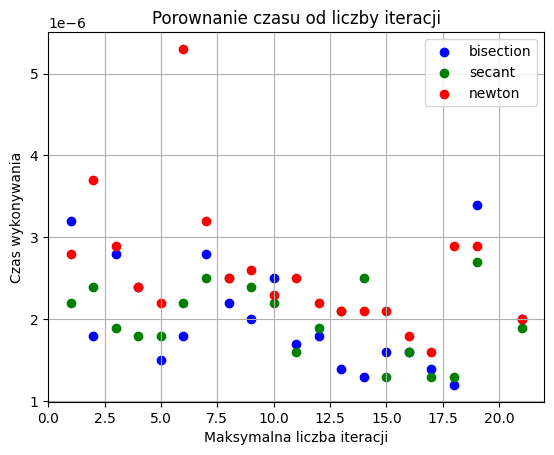

In [36]:
# ===== Twoja implementacja tutaj =====
epsilon = 1e-10
it = 100
bis  = main.bisection(0.5, 1.0, main.func, epsilon, it)
sie  = main.secant(0.5, 1.0, main.func, epsilon, it)
new  = main.newton(main.func, main.dfunc, main.ddfunc, 0.5, 1, epsilon, it)

print(f"Bisekcja:\n{bis}")
print(f"Sieczna:\n{sie}")
print(f"Newton:\n{new}")

# === Badanie czasu w zaleznosci od liczby iteracji ===
iters = np.linspace(1, 21, 20, dtype=int)

bis_time = []
sie_time = []
new_time = []

for it in iters:
    b_time = %timeit -n 1 -r 1 -o main.bisection(0.5, 1.0, main.func, epsilon, it)
    bis_time.append(b_time.average)

    s_time = %timeit -n 1 -r 1 -o main.secant(0.5, 1.0, main.func, epsilon, it)
    sie_time.append(s_time.average)

    n_time = %timeit -n 1 -r 1 -o main.newton(main.func, main.dfunc, main.ddfunc, 0.5, 1, epsilon, it)
    new_time.append(n_time.average)


fig_time, ax_time = plt.subplots()

ax_time.scatter(iters, bis_time, color='blue', label='bisection')
ax_time.scatter(iters, sie_time, color='green', label='secant')
ax_time.scatter(iters, new_time, color='red', label='newton')
ax_time.grid(True)
ax_time.set_xlabel('Maksymalna liczba iteracji')
ax_time.set_ylabel('Czas wykonywania')
ax_time.set_title('Porownanie czasu od liczby iteracji')
ax_time.legend()

Wnioski do zad 6.
W ostatnim zadaniu wyznaczono miejsca zerowe funkcji przy użyciu własnych implementacji metod numerycznych bisekcji, siecznych i Newtona, przy bardzo małej tolerancji epsilon = 1e-10 oraz maksymalnej liczbie iteracji 100. Uzyskane wyniki pokazują, że wszystkie trzy metody poprawnie znalazły miejsce zerowe w pobliżu 0.91656258, a liczba iteracji potrzebna do osiągnięcia zbieżności była różna: metoda Newtona wymagała najmniej iteracji 4, metoda siecznych 5, a bisekcja 31 iteracji. Analiza czasu wykonywania w zależności od liczby iteracji pokazuje, że w większości przypadków najmniejsze czasy wykonania uzyskiwała metoda bisekcji, nieco wolniejsza była metoda siecznych, a Newton zwykle był najwolniejszy. Zdarzały się jednak wyjątki np. dla it = 19 bisekcja okazała się wolniejsza od pozostałych metod. Wnioski te potwierdzają, że choć metoda Newtona jest zwykle szybsza pod względem liczby iteracji, jej czas obliczeń może być zmienny w zależności od konkretnego przypadku, natomiast metoda bisekcji jest stabilna i przewidywalna, choć wymaga większej liczby kroków do zbieżności.

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)